<a href="https://colab.research.google.com/github/andysingal/nlp/blob/main/spam_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Jun  6 03:51:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
#!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:gW+qaGfBFtGfBfwWosBg7qEDbZmFVJwdEvq6psCYfZM root@3a5b4c44adb1
The key's randomart image is:
+---[RSA 4096]----+
| .+*==.o..       |
| +.=*.o.o o      |
|. O  o.o.= .     |
|.+ o. ..o.o      |
|o ....  S.       |
|o+ .+. o         |
|+.o.E..          |
|. o+oo           |
|.+oo.            |
+----[SHA256]-----+


In [6]:
#!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-d410d4f8


In [7]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDX68ZCL9ZsjmhXQEGh01c1EuLaMtpFcr0QU7EL5KdPfgeC+tbgpr3laG1d5q55dGVVg5dKhS3aZyTeqjEU7D7rDFKYdJEW/Sm8EBQ6bmMW64clVtmaj04RKvib8xbcIGdEASoDVT7I5VpRESUrI6gBmLi50e0jiWbB4BhuP7vTDArLFvXF57k6/bj/X3lJ6OimJffb8pBi/BtNpLozzwdqrxmALbi9fZAk8NXnENAxe3nlskZ6W+nRWxwsS6gw6DoImC5+1EGnvYzuJ0hhEFkc42nXyrRsR8WuaTdBTRXRqhDhJxYBbIouHHfayXdD6Guao/2gUUohstcvDfEm/OlNP+JYyo54otuh3YpgnaEoFa99Z3BMsh0103ThEmzUXUW0alMszCm+0/nYd5UUeYDSRvK6Ayf0A/ync45S8Z3qc39qojl3RXrfl5d4d2TUmHl0XJWPwVqJi7rMWOwLQWbSCJRwr3zJLB+TSA5Mcqtt9jpmuCPZIYEkNnPjPhntBB0hTdGNm5ZRFNuuefipfN7/vxwgLs5uuTrICHIe3Ys3qIdsMekc0Y+m43mgnVUIp+x+LVCNh5c56oWjGQoOipBowfbngDdEE9cDpSFdm8+yXCa0nOo6l6k9/u8pa9hCDOh8M93vF31ceXjwBDmi/gZvCeQoXHr//pXxnGAVSENg1Q== root@3a5b4c44adb1


In [8]:
#!ssh -T git@github.com

Hi andysingal! You've successfully authenticated, but GitHub does not provide shell access.


In [9]:
#!pip install git+ssh://git@github.com/andysingal/preprocess_andy.git

  Cloning ssh://****@github.com/andysingal/preprocess_andy.git to /tmp/pip-req-build-mrrp5bki
  Running command git clone -q 'ssh://****@github.com/andysingal/preprocess_andy.git' /tmp/pip-req-build-mrrp5bki
  Created wheel for preprocess-andy: filename=preprocess_andy-0.0.3-cp37-none-any.whl size=3890 sha256=2683ef16e5924c2850f216e91634a252788222dc7d05ce88444069603cf1ea32
  Stored in directory: /tmp/pip-ephem-wheel-cache-8m52wdmn/wheels/bd/c8/a9/9710fa3377633663e701630bfdc3d87970f2903746127358cd
Successfully built preprocess-andy


In [14]:
#!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import preprocess_andy as ps

In [11]:
df = pd.read_csv('drive/MyDrive/NLP/spam.tsv', sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [12]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [16]:
df

,label,message,length,punct
0,ham,go until jurong point crazy Available only in ...,111,9
1,ham,ok lar Joking wif you oni,29,6
2,spam,free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,u dun say so early hor U c already then say,49,6
4,ham,nah I do not think he go to usf he live around...,61,2
...,...,...,...,...
5567,spam,this is the 2nd time we have try 2 contact you...,160,8
5568,ham,Will you b go to esplanade fr home,36,1
5569,ham,pity was in mood for that Soany other suggestion,57,7
5570,ham,the guy do some bitching but I act like i woul...,125,1


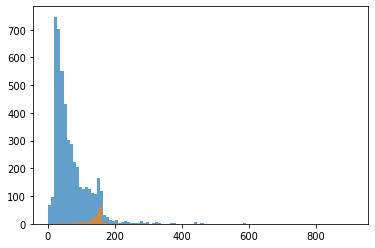

In [18]:
plt.hist(df[df['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(df[df['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

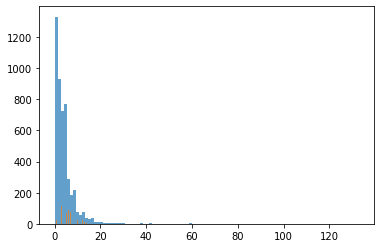

In [20]:
plt.hist(df[df['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(df[df['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test =  train_test_split(df['message'], df['label'], test_size = 0.3, random_state =0, shuffle = True)

#2) Building the Model (Random Forest)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [25]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [26]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

#3) Predicting the results (Random Forest)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [29]:
accuracy_score(y_test, y_pred)

0.9754784688995215

In [30]:
confusion_matrix(y_test, y_pred)

array([[1451,    0],
       [  41,  180]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1451
        spam       1.00      0.81      0.90       221

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672

